# TASK 1


In [ ]:
import numpy as np
import pandas as pd

M = np.array([2, 7, 6, 4, 1, 8, 5, 9, 6, 2, 4, 1, 5, 8, 3, 5, 2])

def sliding_window(x, w, step):
    num_windows = (len(x) - w) // step + 1
    A = np.zeros((num_windows, w))
    for i in range(num_windows):
        A[i] = x[i * step:i * step + w]
    return A




In [ ]:
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


# TASK 2


In [ ]:

#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

df = pd.read_csv('adult.data.txt', sep=', ', names = ["age", "workclass", "fnlwgt", "education",
                    "education-num", "marital-status", "occupation", "relationship",
                    "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])
df.head()



<ipython-input-5-f8cb5a8ebd5c>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('adult.data.txt', sep=', ', names = ["age", "workclass", "fnlwgt", "education",


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. подсчет кол-ва мужчин


In [ ]:

male_count = (df['sex'] == 'Male').sum()
print(male_count)


21790


2. средний возраст женщин

In [ ]:

female_ages = df[df['sex'] == 'Female']['age']
average_age_female = female_ages.mean()

print(average_age_female)


36.85823043357163


3. какова доля граждан Германии (признак native-country)?


In [ ]:
germany_count = (df['native-country'] == 'Germany').sum()

germany_share = 100 * germany_count / len(df)

print(germany_share)

0.42074874850281013


4. Постройте гистограмму распределения (bar plot) образования людей (признак education).


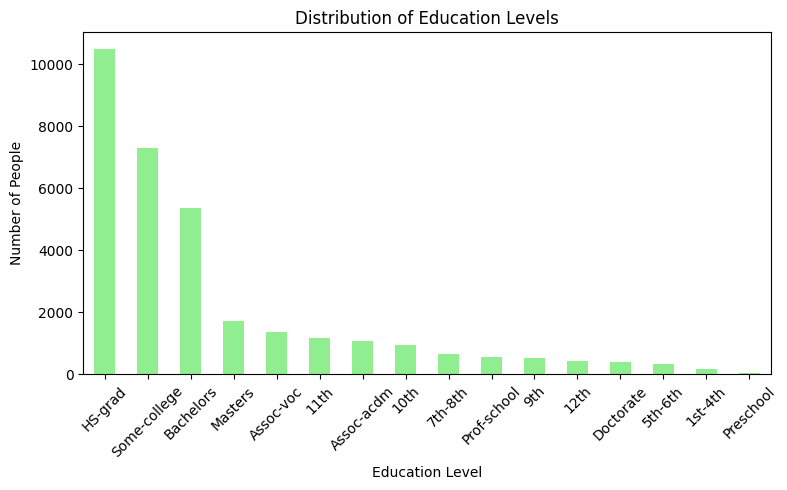

In [ ]:
import matplotlib.pyplot as plt

education_counts = df['education'].value_counts()


plt.figure(figsize=(8, 5))
education_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает менее 50K в год?

In [ ]:
less_than_50k = df[df['salary'] == '<=50K']


mean_age = less_than_50k['age'].mean()
std_age = less_than_50k['age'].std()

print(f"Средний возраст: {mean_age}")
print(f"Среднеквадратичное отклонение возраста: {std_age}")

Средний возраст: 36.78373786407767
Среднеквадратичное отклонение возраста: 14.02008849082488


6. правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)


In [ ]:

higher_education_levels = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']


higher_salary = df[df['salary'] == '>=50K']


all_higher_education = higher_salary['education'].isin(higher_education_levels).all()

if all_higher_education:
    print("Да, все люди, которые получают более 50K, имеют как минимум высшее образование.")
else:
    print("Нет, есть люди, которые получают более 50K и не имеют высшего образования.")

Да, все люди, которые получают более 50K, имеют как минимум высшее образование.


7. выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Каков максимальный возраст мужчин расы Amer-Indian-Eskimo?

In [ ]:

age_statistics = df.groupby(['race', 'sex'])['age'].describe()

print(age_statistics)

max_age = df[(df['race'] == 'Amer-Indian-Eskimo') & (df['sex'] == 'Male')]['age'].max()
print(f"Максимальный возраст мужчин расы Amer-Indian-Eskimo: {max_age}")

                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex

8. среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми


In [ ]:

males = df[df['sex'] == 'Male']

males['is_married'] = males['marital-status'].str.startswith('Married')

married_males = males[males['is_married']]
married_high_salary_ratio = (married_males['salary'] == '>50K').mean()


single_males = males[~males['is_married']]
single_high_salary_ratio = (single_males['salary'] == '>50K').mean()


#print(f"Доля зарабатывающих более 50K среди женатых мужчин: {married_high_salary_ratio:.2%}")
#print(f"Доля зарабатывающих более 50K среди холостых мужчин: {single_high_salary_ratio:.2%}")


if married_high_salary_ratio > single_high_salary_ratio:
    print("Среди женатых мужчин больше доля зарабатывающих более 50K.")
else:
    print("Среди холостых мужчин больше доля зарабатывающих более 50K.")

Доля зарабатывающих более 50K среди женатых мужчин: 44.05%
Доля зарабатывающих более 50K среди холостых мужчин: 8.45%
Среди женатых мужчин больше доля зарабатывающих более 50K.


<ipython-input-84-a863f02678e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['is_married'] = males['marital-status'].str.startswith('Married')


9. какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?


In [ ]:

max_hours_per_week = df['hours-per-week'].max()


num_people_max_hours = (df['hours-per-week'] == max_hours_per_week).sum()

num_high_salary_max_hours = df[(df['hours-per-week'] == max_hours_per_week) & (df['salary'] == '>50K')].shape[0]
percent_high_salary_max_hours = (num_high_salary_max_hours / num_people_max_hours) * 100

print(f"Максимальное количество часов работы в неделю: {max_hours_per_week}")
print(f"Количество людей, работающих {max_hours_per_week} часов в неделю: {num_people_max_hours}")
print(f"Процент зарабатывающих более 50K среди них: {percent_high_salary_max_hours:.2f}%")

Максимальное количество часов работы в неделю: 99
Количество людей, работающих 99 часов в неделю: 85
Процент зарабатывающих более 50K среди них: 29.41%


10. посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country)


In [ ]:
average_hours_per_week = df.groupby(['native-country', 'salary'])['hours-per-week'].mean().reset_index()


average_hours_per_week_output = average_hours_per_week.pivot(index='native-country', columns='salary', values='hours-per-week')

print(average_hours_per_week_output)

salary                          <=50K       >50K
native-country                                  
?                           40.164760  45.547945
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary             

# TASK 3


**Датасет: https://www.kaggle.com/datasets/mohamedhanyyy/top-football-leagues-scorers**

Данные футболистов за 2016-2020 годы

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
footb = pd.read_csv("Data.csv")

0. Содержимое датасета

In [ ]:
footb.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


Размеры датасета

In [ ]:
footb.shape

(660, 15)

**1. Основные статистические характеристики данных по каждому числовому признаку**

In [ ]:
footb.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [ ]:
footb[['Player Names','Goals','Year']]

,Player Names,Goals,Year
0,Juanmi Callejon,11,2016
1,Antoine Griezmann,16,2016
2,Luis Suarez,28,2016
3,Ruben Castro,13,2016
4,Kevin Gameiro,13,2016
...,...,...,...
655,Gyrano Kerk,10,2020
656,Quincy Promes,12,2020
657,Denzel Dumfries,7,2020
658,Cyriel Dessers,15,2020


**2. Футболисты, забившие наибольшее кол-во голов в 2018 году**

In [ ]:
footb_2018 = footb[footb['Year'] == 2018]

top_scorers_2018 = footb_2018.nlargest(5, 'Goals')[['Player Names', 'Country', 'League', 'Club', 'Goals']]

print(top_scorers_2018)

             Player Names Country          League   Club  Goals
195          Lionel Messi   Spain         La Liga  (BAR)     36
251  Kylian Mbappe-Lottin  France  France Ligue 1  (PSG)     33
206    Fabio Quagliarella   Italy         Serie A  (SAM)     26
201          Duvan Zapata   Italy         Serie A  (ATA)     23
219      Krzysztof Piatek   Italy         Serie A  (BSC)     23


**3. Сумма голов по выбранным странам за весь период**

In [ ]:
countries = ['England', 'Italy', 'Spain', 'Brazil', 'Germany', 'France']
country_goals = footb[footb['Country'].isin(countries)]
country_goals_by_country = country_goals.groupby('Country')['Goals'].sum().reset_index()
country_goals_by_country = country_goals_by_country.sort_values('Goals', ascending=False).reset_index(drop=True)
country_goals_by_country

,Country,Goals
0,Italy,1382
1,Spain,1314
2,Germany,1218
3,England,1078
4,Brazil,1033
5,France,604


График суммы голов по странам

In [ ]:
import matplotlib.pyplot as plt

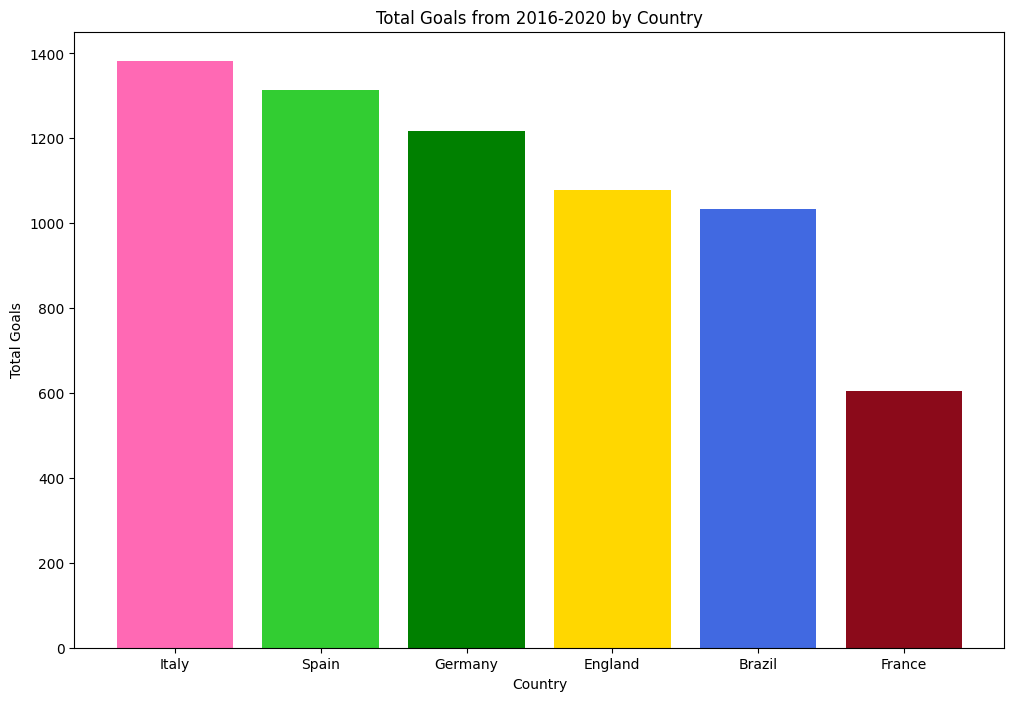

In [ ]:
colors = ['#FF69B4', '#32CD32', '#008000', '#FFD700', '#4169E1', '#8B0A1A']


plt.figure(figsize=(12, 8))
plt.bar(country_goals_by_country['Country'], country_goals_by_country['Goals'],color=colors)


plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.title("Total Goals from 2016-2020 by Country")
plt.show()

**4. Рейтинг футболистов по забитым мячам (топ-5)**

In [ ]:
player_goals = footb.groupby('Player Names')['Goals'].sum().reset_index()

top_5_players = player_goals.nlargest(5, 'Goals')
top_5_players

,Player Names,Goals
259,Lionel Messi,135
368,Robert Lewandowski,127
93,Cristiano Ronaldo,111
86,Ciro Immobile,107
273,Luis Suarez,95


График рейтинга по забитым мячам

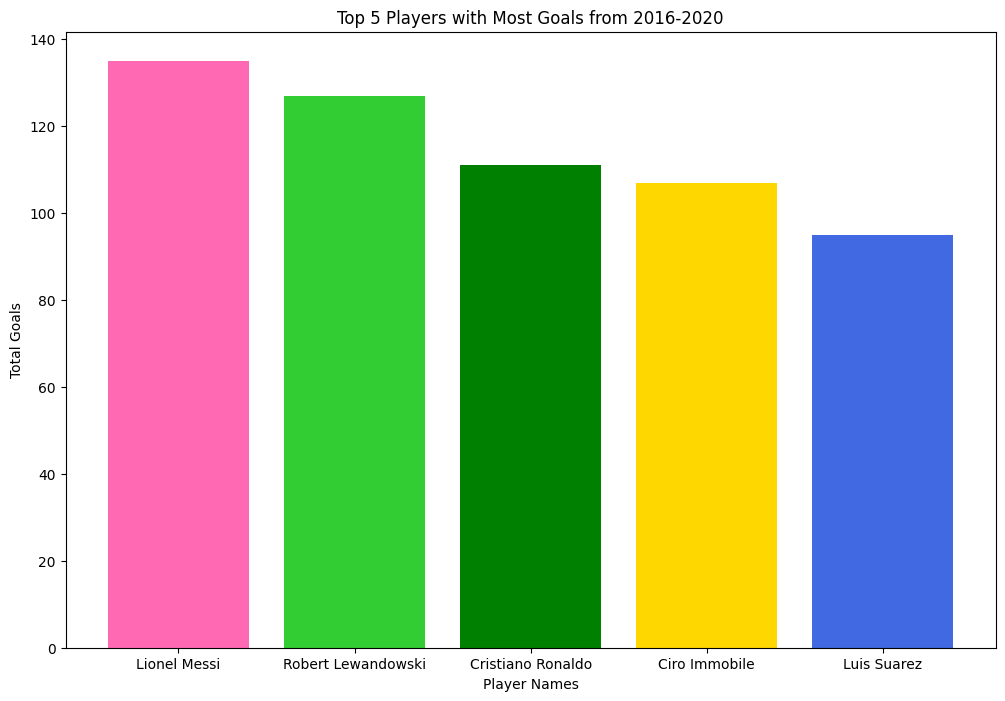

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(top_5_players['Player Names'], top_5_players['Goals'],color=colors)

plt.xlabel('Player Names')
plt.ylabel('Total Goals')
plt.title('Top 5 Players with Most Goals from 2016-2020')

plt.show()

**5. Сводка о данных датасета**

In [ ]:
footb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

**6. Кол-во футболистов в каждой стране**

In [ ]:
country_count = footb["Country"].value_counts()
country_count

,count
Country,
Spain,100
Italy,100
Germany,100
Brazil,100
England,80
France,60
USA,40
Portugal,40
Netherlands,40


Долевая диаграмма по кол-ву футболистов в странах

In [ ]:
import plotly.express as px

px.pie(values=country_count.values, names=country_count.index,
                 title='Count of Players by Country')

**7. Кол-во футболистов в каждом клубе**

In [ ]:
club_count=footb['Club'].value_counts().reset_index(name='Count')
club_count

,Club,Count
0,(PSG),14
1,(BAR),13
2,(NAP),13
3,(FLA),11
4,(ATA),11
...,...,...
174,(LOK),1
175,(GAL),1
176,(SIV),1
177,(CAE),1


**8. Общее сыгранное время каждого футболиста (в минутах)**

In [ ]:
player_minutes = footb.groupby('Player Names')['Mins'].sum().reset_index()

top_5_powered = player_minutes.sort_values(by='Mins', ascending=False).head()
top_5_powered

,Player Names,Mins
22,Andrea Belotti,13596
86,Ciro Immobile,13081
259,Lionel Messi,12773
189,Iago Aspas,12306
143,Fabio Quagliarella,12270


График по сыгранному времени

In [ ]:
px.bar(player_minutes, x='Player Names', y='Mins', title='Total Minutes Played by Player',color_discrete_sequence=['#5e3c58'])

**9. Вывод кол-ва забитых мячей футболистами Барселоны**

In [ ]:
footb[['Player Names','Goals','Year']][footb['Club']=='(BAR)'].sort_values(by='Goals', ascending=False)

,Player Names,Goals,Year
12,Lionel Messi,37,2016
195,Lionel Messi,36,2018
107,Lionel Messi,33,2017
333,Lionel Messi,25,2019
101,Antoine Griezmann,19,2017
1,Antoine Griezmann,16,2016
193,Antoine Griezmann,15,2018
69,Philippe Coutinho,13,2016
125,Mirco Antenucci,11,2017
374,Trincao,8,2019


**10. График зависимости кол-ва забитых голов Лионеля Месси от года**

<Axes: xlabel='Year', ylabel='Goals'>

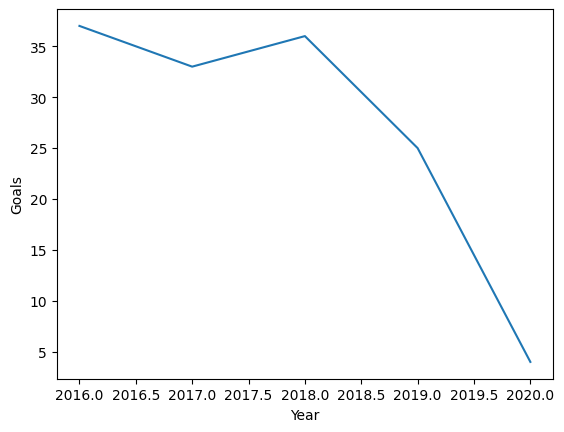

In [ ]:
import seaborn as sns

messi = footb[footb.loc[:, "Player Names"] == "Lionel Messi"]
sns.lineplot(data=footb, x=messi["Year"], y=messi["Goals"])